**Loading Libraries and Dataset**

In [1]:
'''
!pip install pycountry
!pip install cufflinks
!pip install plotly-express
!pip install chart_studio
!pip install folium
!pip install bar_chart_race
'''

'\n!pip install pycountry\n!pip install cufflinks\n!pip install plotly-express\n!pip install chart_studio\n!pip install folium\n!pip install bar_chart_race\n'

In [2]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart

import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs


# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
city_day = pd.read_csv('../Dataset/city_day.csv')
cities_db = pd.read_csv('../Dataset/Indian Cities Database.csv')

**Data Preprocessing**

1 Converting Date(string) to Date(Datetime)

2 Combining PM2.5 and PM10 into a single Unit PM

In [4]:
city_day['Date'] = pd.to_datetime(city_day['Date'])

In [5]:
city_day['PM'] = city_day['PM2.5']+city_day['PM10']

**Monthly Analysis of Pollutants**

**Pointplot** to see monthly trend of different pollutants in last 5 years

In [6]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :]).set_title("Month-wise Plot")
    plt.show()

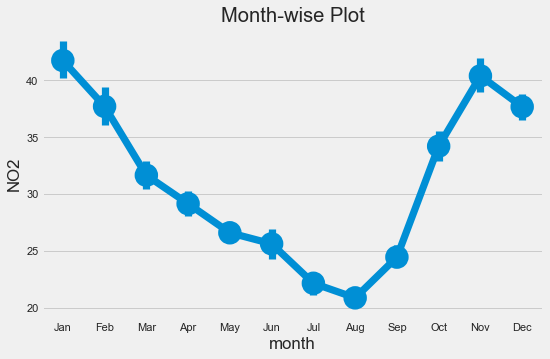

In [7]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

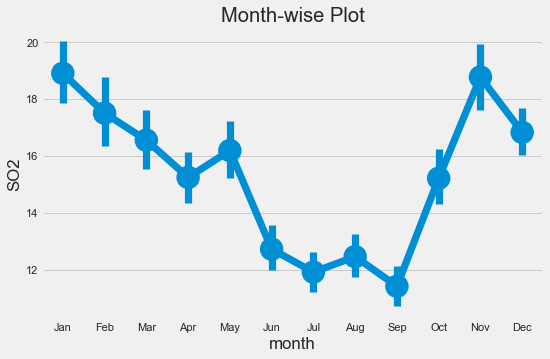

In [8]:
value='SO2'
trend_plot(df,value)

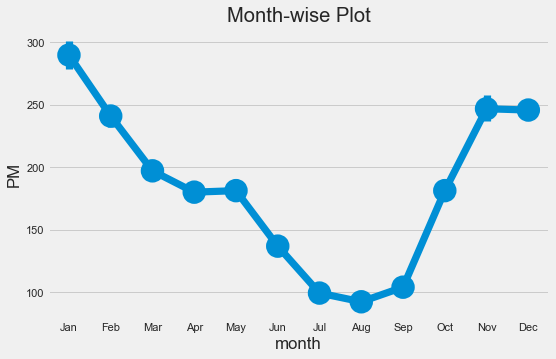

In [9]:
value='PM'
trend_plot(df,value)

* From these three plots, we can clearly see that the pollution level in India falls in the Month of July-September. This might happen due to monsoon season. During these days, less number of people move from their home and overall Traffic in the cities is reduces.
* The pollution level then start rising and reach highest leveks in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.


**Finding City having highest pollutants**

In [10]:
x1= city_day[['PM','City']].groupby(["City"]).median().sort_values(by='PM',ascending=False).reset_index()
x2 = city_day[['NO2','City']].groupby(["City"]).median().sort_values(by='NO2',ascending=False).reset_index()
x3 = city_day[['SO2','City']].groupby(["City"]).median().sort_values(by='SO2',ascending=False).reset_index()


from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("PM","NO2",'SO2'))

fig.add_trace(go.Bar( y=x1['PM'], x=x1["City"],  
                     marker=dict(color=x1['PM'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x2['NO2'], x=x2["City"],  
                     marker=dict(color=x2['NO2'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar( y=x3['SO2'], x=x3["City"],  
                     marker=dict(color=x3['SO2'], coloraxis="coloraxis")),
              1, 3)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="City")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()

* Patna, Delhi , Ahmedabad and Kolkata seem to top the charts. Ahmedabad has maximum concenterations of NO2,SO2 levels.

**Impact Of Lockdown due to Covid19 Outbreak**

We have analyze for top 7 cities in India

* Ahmedabad
* Delhi
* Bengaluru
* Mumbai
* Hyderabad
* Chennai
* Kolkata

Lockdown happen in the India close to 25th March 2020

In [11]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai','Kolkata']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

**Analysing AQI of Different Cities**

In [12]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=7, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai','Kolkata'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Kolkata'],
                    marker=dict(color=AQI_pivot['Kolkata'], coloraxis="coloraxis")),
              7, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )

])
                  

fig.show()

 * The black vertical line shows the date on which the first phase of lockdown came into effect in India.
 * The above graph shows the variation of various pollutant levels, from Jan 2019 onwards till date.
 * Apparantely, all the above Indian cities seem to be a dangerously high level of pollution levels.
 * Clearly, there appears to be a rapid decline after 25th March,2020 in all the cities under sonsideration.

**Comparision Of before lockdown AQI  and after lockdown AQI**

In [13]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-31']

In [14]:
compare_df_list=[]
for i in range(len(AQI_beforeLockdown.columns)):
    col=AQI_afterLockdown.columns[i]
    compare_df_list.append([col,AQI_beforeLockdown[col].mean()])

In [15]:
for i in range(len(AQI_afterLockdown.columns)):
    col=AQI_afterLockdown.columns[i]
    compare_df_list[i].append(AQI_afterLockdown[col].mean())

In [16]:
compare_df=pd.DataFrame(compare_df_list,columns=['City','Before Lockdown','After Lockdown'])

In [17]:
compare_df

City  Before Lockdown  After Lockdown
0  Ahmedabad       383.776471      128.208955
1  Bengaluru        96.023529       70.567164
2    Chennai        80.317647       69.776119
3      Delhi       246.305882      125.925373
4  Hyderabad        94.435294       71.925373
5    Kolkata       184.094118       65.343284
6     Mumbai       148.776471       69.477612

In [18]:
import plotly.graph_objects as go
animals=compare_df.City.values

fig = go.Figure(data=[
    go.Bar(name='Before Lockdown', x=animals, y=compare_df['Before Lockdown']),
    go.Bar(name='After Lockdown', x=animals, y=compare_df['After Lockdown'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.write_html('../Html/lockdown-bar.html')
fig.show()

* We can see clearly that the AQI level of After Lockdown drastically fall down with respect to Before Lockdown
* It is clear that Lockdown has significant effect on the Pollution level in India

**Effect of Lockdown on levels of Individual pollutants**


Let's compare the level of pollutants between January and April between between 2020 and 2019. This will give an idea whether the pollution levels have actually subsided or the pollution actually remains low during the onset of summer in India.

In [19]:
start_date1 = '2019-01-01'
end_date1 = '2019-07-31'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-07-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

In [20]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

In [21]:
pollution_comparison('Ahmedabad')


In [22]:
pollution_comparison('Bengaluru')

In [23]:
pollution_comparison('Chennai')

In [24]:
pollution_comparison('Delhi')

In [25]:
pollution_comparison('Mumbai')

In [26]:
pollution_comparison('Hyderabad')

In [27]:
pollution_comparison('Kolkata')

 * It is interesting to note that the Polluiton level in India genrally drops down as summer approaches. This can also be corroborated by the graphs above.
 * However, the reduction in march 2020 is more pronounced as compared to march 2019

**Dual Map to Visualize Changes**

In [28]:
df11 = pollutants_filtered_2019[['City','AQI']]
df22 = pollutants_filtered_2020[['City','AQI']]

df_2019_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index()
df_2020_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_2019_AQI = pd.merge(df_2019_coord,cities_db,on='City')
df_2019_AQI['AQI'] = df_2019_AQI['AQI'].round(0)
df_2020_AQI = pd.merge(df_2020_coord,cities_db,on='City')
df_2020_AQI['AQI'] = df_2020_AQI['AQI'].round(0)

In [29]:
m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=5)

folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)


fg_1 = folium.FeatureGroup(name='2019').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='2020').add_to(m.m2)



for lat, lon, value, name in zip(df_2019_AQI['Lat'], df_2019_AQI['Long'], df_2019_AQI['AQI'], df_2019_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='red'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(fg_1)





for lat, lon, value, name in zip(df_2020_AQI['Lat'], df_2020_AQI['Long'], df_2020_AQI['AQI'], df_2020_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='orange'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='orange',
                        fill_opacity=0.7 ).add_to(fg_2)


folium.LayerControl(collapsed=False).add_to(m)

m